2023/DCSE/0011/SS

YEAR ONE, SEM 2, WITI

DATA SCIENCE & MACHINE LEARNING  CSD 121

# 1: Libraries and dependencies

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 2: Data preprocessing

a) Reading the dataset

In [2]:
# previewing the data
df = pd.read_csv("./data.csv",index_col=0)
print(df)

            gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   
...            ...            ...     ...        ...     ...          ...   
6840-RESVB    Male              0     Yes        Yes      24          Yes   
2234-XADUH  Female              0     Yes        Yes      72          Yes   
4801-JZAZL  Female              0     Yes        Yes      11           No   
8361-LTMKD    Male              1     Yes         No       4          Yes   
3186-AJIEK    Male              0      No         No      66          Yes   

In [3]:
# looking into subject matter of the dataset by checking out column titles
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [ ]:
"""
Observing from the column titles, Dataset appears to be sourced from a Telecom company

"""

b) Visual inspection of missing variables in dataset

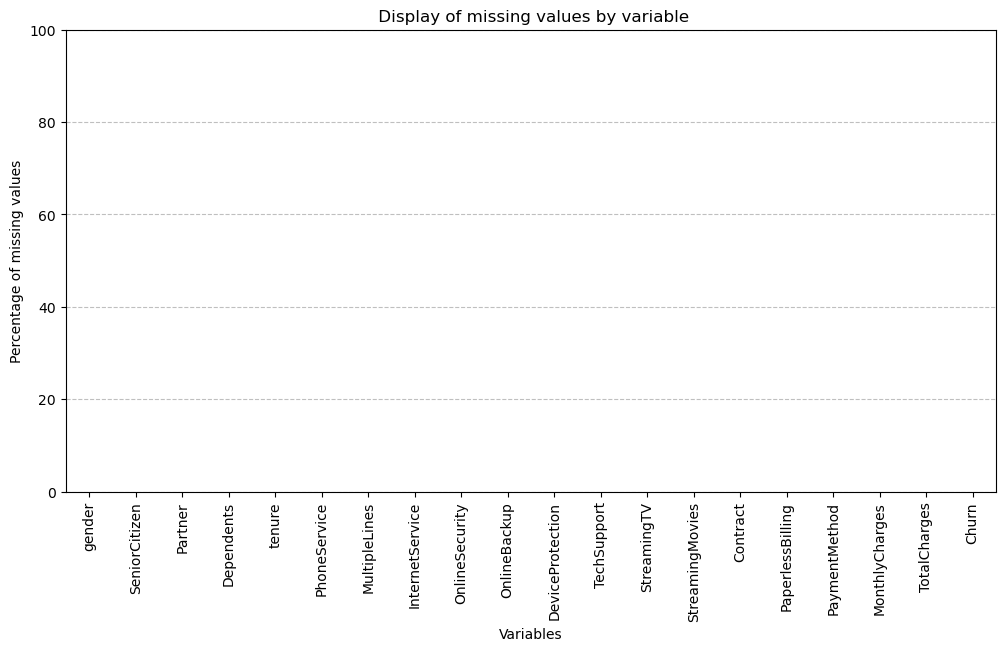

In [5]:
# percentage count of missing values for each variable
missing_values = df.isnull().mean() * 100

# bar plot of missing data
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar', color='pink')
plt.title(' Display of missing values by variable')
plt.xlabel('Variables')
plt.ylabel('Percentage of missing values')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.ylim(0, 100) 
plt.show()

In [6]:
# confirming visualisation
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
"""
There are no missing/null values in the dataset.
"""

c) Size of matrix

In [8]:
rows, columns = df.shape

print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 7043
Number of columns: 20


d) Number of variables in the matrix

In [9]:
variables = df.shape[1]

print("Number of variables:", variables)

Number of variables: 20


e) Dropping unnecessary column(s) in matrix

In [10]:
drop_df = pd.read_csv("./data.csv")

# dropping column customerID 
drop_df = drop_df.drop(columns='customerID')  
  
print(drop_df) 

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

In [11]:
"""
I have only dropped customer ID as all the other metrics are relevant. 
""" 

# List of remaining columns
print(drop_df.columns.tolist())

# number of remaining columns
number_columns = len(drop_df.columns)
print("\nTotal number of columns:", number_columns)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Total number of columns: 20


f) Filling missing values in column 'TotalCharges'

In [12]:
column_name = 'TotalCharges'
missing_values = df['TotalCharges'].isnull().sum()

print("Number of missing values in column '{}': {}".format(column_name, missing_values))

Number of missing values in column 'TotalCharges': 0


g) Transforming labels for variable "Senior Citizen" from 0/1 to No/Yes

In [13]:
mapping = {0: 'No', 1: 'Yes'}

df['SeniorCitizen'] = df['SeniorCitizen'].replace(mapping)

print(df['SeniorCitizen'])

customerID
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK     No
7795-CFOCW     No
9237-HQITU     No
             ... 
6840-RESVB     No
2234-XADUH     No
4801-JZAZL     No
8361-LTMKD    Yes
3186-AJIEK     No
Name: SeniorCitizen, Length: 7043, dtype: object


# 3: Exploratory Data Analysis 

a) Distribution of customer churn in the dataset


In [ ]:
""""
Churning
The number of existing customers who may leave a service provider over a given period. [1]

"""

In [72]:
# checking out unique values 
df["Churn"].nunique()
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [93]:
# value counts of the attributes no, yes
churn_distribution = df['Churn'].value_counts()

print("Distribution of customer churn:")
print(churn_distribution)

Distribution of customer churn:
No     5174
Yes    1869
Name: Churn, dtype: int64


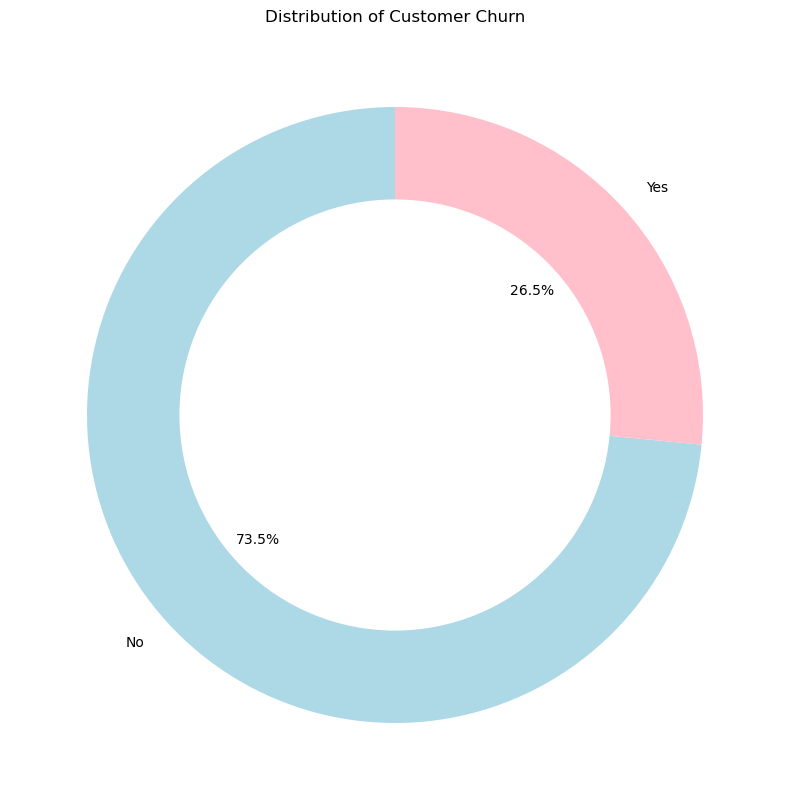

In [16]:
# churn counts 
churn_counts = df['Churn'].value_counts() 

# plotting the donut chart
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])

# visualising effects
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.title('Distribution of Customer Churn')
plt.show()

b) Exploring how customer churn distribution varies across gender in the dataset

<Figure size 1000x1000 with 0 Axes>

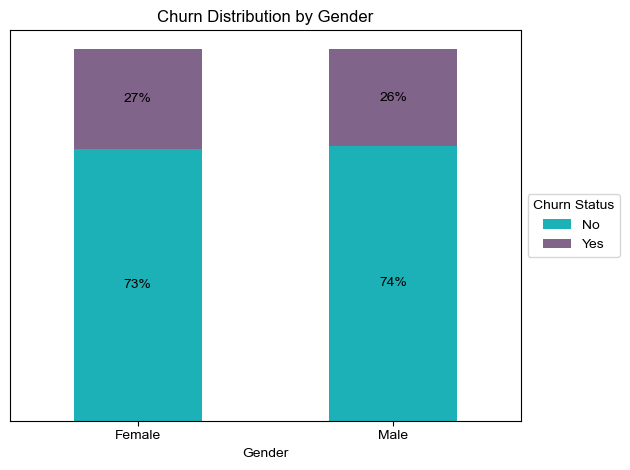

In [17]:
# grouping
gender_type = df.groupby('gender')

# churn rate for each gender type
churn_rates = gender_type['Churn'].value_counts(normalize=True) * 100

# plotting stacked bar chart
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(10, 10))
ax = churn_rates.unstack().plot(kind='bar', stacked=True, color=['#1cb0b7', '#81648a'])

# displaying percentage [2]
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
# plt.ylabel('Churn Rate (%)')
plt.legend(title='Churn Status', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=0)

# omitting y-axis's automated scale
plt.gca().axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

In [73]:
# value counts
male_churn_distribution = df[df['gender'] == 'Male']['Churn'].value_counts()
female_churn_distribution = df[df['gender'] == 'Female']['Churn'].value_counts()

print("Distribution of customer churn for Male customers:")
print(male_churn_distribution)

print("\nDistribution of customer churn for Female customers:")
print(female_churn_distribution)

Distribution of customer churn for Male customers:
No     2625
Yes     930
Name: Churn, dtype: int64

Distribution of customer churn for Female customers:
No     2549
Yes     939
Name: Churn, dtype: int64


c) Exploring how customer churn distribution varies by contract type

In [19]:
# taking a sneek peek into the contract type column
print(df['Contract'])

customerID
7590-VHVEG    Month-to-month
5575-GNVDE          One year
3668-QPYBK    Month-to-month
7795-CFOCW          One year
9237-HQITU    Month-to-month
                   ...      
6840-RESVB          One year
2234-XADUH          One year
4801-JZAZL    Month-to-month
8361-LTMKD    Month-to-month
3186-AJIEK          Two year
Name: Contract, Length: 7043, dtype: object


In [79]:
# checking out unique values 
df["Contract"].nunique()

3

In [80]:
# attributes
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [76]:
# quantification
df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<Figure size 1000x1000 with 0 Axes>

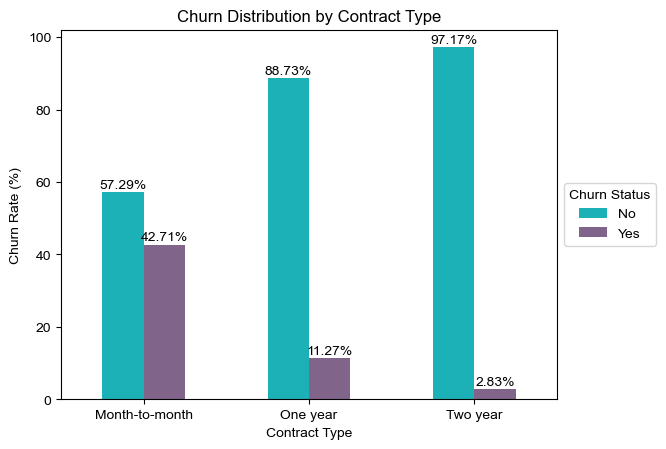

In [96]:
# grouping
contract_churn_groups = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)

# churn rates for each contract type
contract_churn_rates = contract_churn_groups.div(contract_churn_groups.sum(axis=1), axis=0) * 100

# plotting grouped bar chart
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(10, 10))
ax = contract_churn_rates.plot(kind='bar', stacked=False, color=['#1cb0b7', '#81648a'])

# displaying the percentage on the top of each bar [2]
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn Status', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

d) Exploring how customer churn distribution varies by payment method

In [22]:
# taking a sneek peek into the payment method column
print(df['PaymentMethod'])

customerID
7590-VHVEG             Electronic check
5575-GNVDE                 Mailed check
3668-QPYBK                 Mailed check
7795-CFOCW    Bank transfer (automatic)
9237-HQITU             Electronic check
                        ...            
6840-RESVB                 Mailed check
2234-XADUH      Credit card (automatic)
4801-JZAZL             Electronic check
8361-LTMKD                 Mailed check
3186-AJIEK    Bank transfer (automatic)
Name: PaymentMethod, Length: 7043, dtype: object


In [82]:
# checking out unique values 
df["PaymentMethod"].nunique()

4

In [92]:
# atrributes
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [84]:
# quantification
df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<Figure size 1500x1000 with 0 Axes>

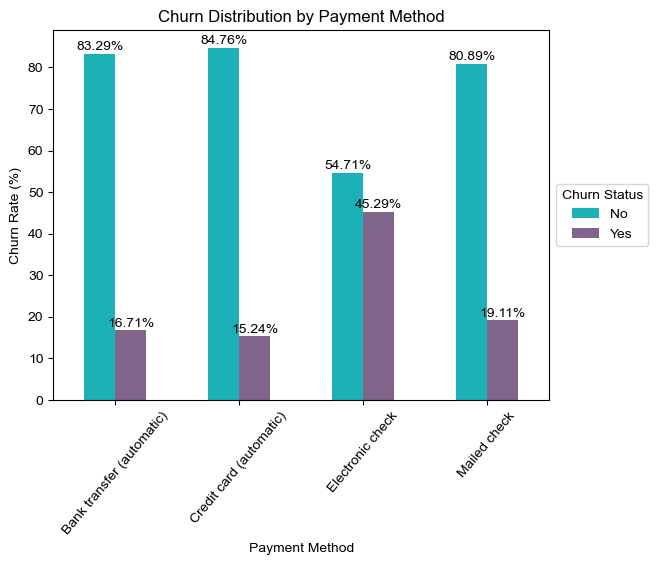

In [98]:
# grouping
payment_churn_groups = df.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)

# churn rates for each payment method
payment_churn_rates = payment_churn_groups.div(payment_churn_groups.sum(axis=1), axis=0) * 100

# plotting grouped bar chart
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(15, 10))
ax = payment_churn_rates.plot(kind='bar', stacked=False, color=['#1cb0b7', '#81648a'])

# displaying percentage on the top of each bar [2]
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Churn Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.xticks(rotation=50)
plt.ylabel('Churn Rate (%)')
plt.legend(title='Churn Status', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

e) Exploring how customer churn distribution varies by internet service and gender

In [25]:
# taking a sneek peek into the internet service and gender column
print(df[['InternetService', 'gender']])

           InternetService  gender
customerID                        
7590-VHVEG             DSL  Female
5575-GNVDE             DSL    Male
3668-QPYBK             DSL    Male
7795-CFOCW             DSL    Male
9237-HQITU     Fiber optic  Female
...                    ...     ...
6840-RESVB             DSL    Male
2234-XADUH     Fiber optic  Female
4801-JZAZL             DSL  Female
8361-LTMKD     Fiber optic    Male
3186-AJIEK     Fiber optic    Male

[7043 rows x 2 columns]


In [86]:
# checking out unique values 
df["InternetService"].nunique()

3

In [87]:
df["gender"].nunique()

2

In [88]:
# attributes
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [89]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [90]:
# quantification
df["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [91]:
df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<Figure size 1000x1000 with 0 Axes>

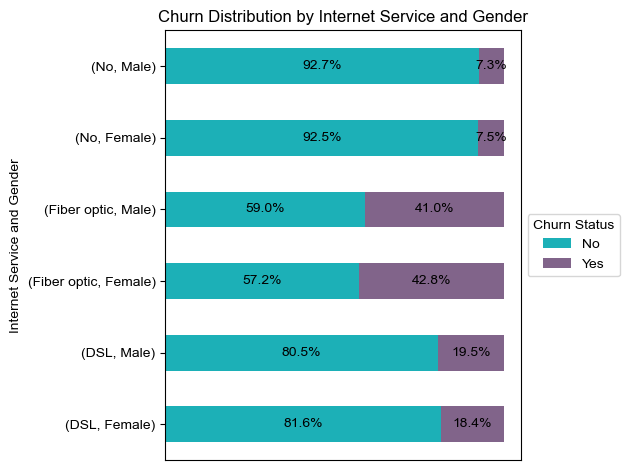

In [27]:
# grouping
internetservice_gender_groups = df.groupby(['InternetService', 'gender'])

# churn rates for each combination of internet service and gender
churn_rates = internetservice_gender_groups['Churn'].value_counts(normalize=True).unstack(fill_value=0) * 100

# plotting horizontal stacked bar chart
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(10, 10))
ax = churn_rates.plot(kind='barh', stacked=True, color=['#1cb0b7', '#81648a'])

# indicating rates [2]
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{width:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.title('Churn Distribution by Internet Service and Gender')
plt.ylabel('Internet Service and Gender')
plt.legend(title='Churn Status', loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().axes.get_xaxis().set_visible(False)  # omitting x axis automated scale
plt.tight_layout()
plt.show()

f) Visualisation & comparison of the correlation between churn rates and ’SeniorCitizen’, ’Partner’, ’Dependents’, ’tenure’, ’PhoneService’, ’PaperlessBilling’, ’MonthlyCharges’, ’TotalCharges

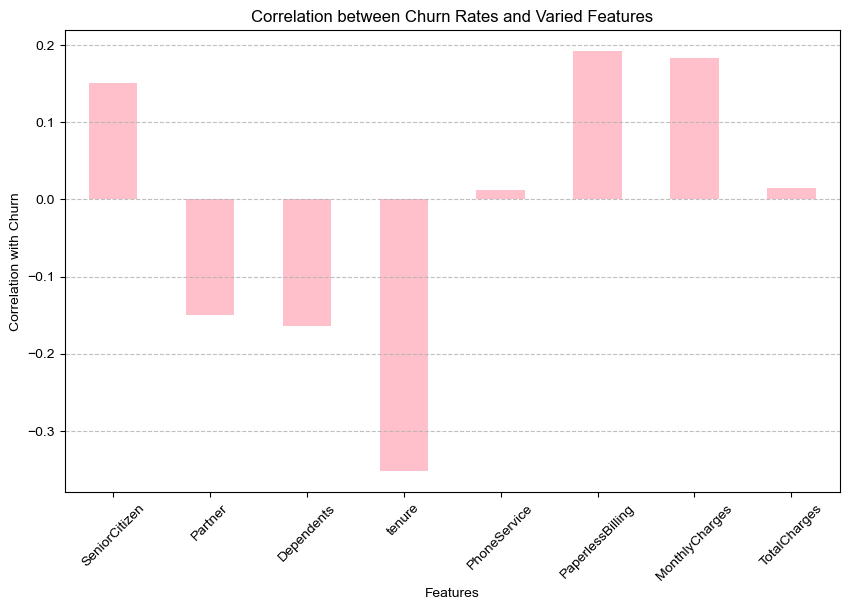

In [28]:
# defining features
features = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
                     'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

# creating subset dataframe with the specified features
subset_df = df[features].copy()  

# encoding categorical labels with numerical labels
label_encoder = LabelEncoder()
for feature in features:
    subset_df[feature] = label_encoder.fit_transform(subset_df[feature])
    
# calculating the correlation between Churn and the other features
correlation_with_churn = subset_df.corr()['Churn'].drop('Churn')

# visualising barplot
plt.figure(figsize=(10, 6))
correlation_with_churn.plot(kind='bar', color='pink')
plt.title('Correlation between Churn Rates and Varied Features')
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.show()

In [ ]:
""""
Churn rates are indicators of price sensitivity and value proposition alignment.
 
Churn rates and SeniorCitizen, PaperlessBilling, MonthlyCharges have a weak positive correlation. 
This suggests that as the segment of: 'senior citizens in the customer base', 'number of customers using paperless billing', 
and 'monthly charges' increase, churn rates also tend to increase slightly. 
This could imply that senior citizens, paperless billing users, and customers facing higher monthly charges might be more price-sensitive 
or perceive less value from the service, leading to higher churn rates.

There is a negative correlation between churn rates and Partner, Dependents, tenure, PaperlessBilling, MonthlyCharges, TotalCharges, 
signifying that these variables increase as churn rates decrease and viceversa. 
This suggests that customers who have partners, dependents, have been with the service for a longer time, use paperless billing, 
and have higher monthly and total charges are less likely to churn. 
It's possible that these customers perceive more value from the service or are less sensitive to price changes.

PhoneService has no significant linear relationship with churn rates. Further exploration has to be carried out concerning 
the presence or absence of phone service not captured in the linear relationship to ascertain if it may affect the decision to churn.

"""

# 4: Regression analysis

Using the underlying objective function for Logistic Regression and K-Nearest Neighbor Cluster algo-
rithm, create the corresponding matrices for inputs (’X’) and outputs (’y’). Use the generated inputs
and output to classify the churn among customers in the dataset. It is important to note that for
columns of :”tenure”, ’MonthlyCharges’, ’TotalCharges’, you may need to first standardize the scales
as they may be distributed across wide ranges

In [119]:
# libraries
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_auc_score, accuracy_score 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import cross_val_score

In [120]:
# extracting data
df = pd.read_csv("./data.csv")

In [121]:
# data preprocessing
X = df.drop(columns=['Churn', 'customerID'])    # Features
y = df['Churn']                                 # Target

In [122]:
# encoding categorical variables
encoder = LabelEncoder()
X_encoded = X.copy()
for col in X.columns:
    if X[col].dtype == 'object':
        X_encoded[col] = encoder.fit_transform(X[col])

In [123]:
# standardizing the numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_encoded[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])

In [124]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [125]:
# checking out shape of X_train and X_test
X_train.shape, X_test.shape

((5634, 19), (1409, 19))

In [126]:
# defining pipeline for the logistic regression model
logistic_pipeline = Pipeline([
    ('classifier', logistic_model)
])

In [127]:
# defining pipeline for the KNN model
knn_pipeline = Pipeline([
    ('classifier', knn_model)
])

In [128]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [129]:
# K-Nearest Neighbor
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [130]:
# prediction
logistic_predictions = logistic_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)

In [134]:
# evaluating models using cross-validation
models = [('Logistic Regression', logistic_pipeline), ('K-Nearest Neighbors', knn_pipeline)]
results = []

for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results.append((name, cv_scores.mean(), cv_scores.std(), accuracy_scores.mean(), accuracy_scores.std()))

In [132]:
# accuracy evaluation
logistic_accuracy = np.mean(logistic_predictions == y_test)
knn_accuracy = np.mean(knn_predictions == y_test)

In [135]:
# displaying results
print("Logistic Regression Accuracy:", logistic_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

Logistic Regression Accuracy: 0.815471965933286
K-Nearest Neighbors Accuracy: 0.7735982966643009


Evaluation of logistic and KNN models using the metrics [”Algorithm”, ”ROC AUC
Mean”, ”ROC AUC STD”, ”Accuracy Mean”, ”Accuracy STD”]

In [136]:
# evaluation results
results_df = pd.DataFrame(results, columns=['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD'])
print(results_df)

             Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy STD
0  Logistic Regression      0.838425     0.010272       0.800497      0.010494
1  K-Nearest Neighbors      0.764955     0.013611       0.758784      0.008252


In [ ]:
"""
Logistic Regression has higher mean ROC AUC (0.838425 vs. 0.764955) and mean Accuracy (0.800497 vs. 0.758784) compared to K-Nearest Neighbors. 
LR has outperformed KNN in terms of both ROC AUC and Accuracy which implies that it is better at differentiating between the classes.

Logistic Regression has exhibited lower standard deviations in both ROC AUC and Accuracy, 
indicating more desirably stable performance across different samples or folds.

KNN has a lower STD for Accuracy (0.0082) compared to Logistic Regression (0.010494). 
This suggests KNN's performance might be more consistent across different datasets, even though its mean accuracy is slightly lower.

"""

REFERENCES: 

[1] https://www.sciencedirect.com/science/article/pii/S2666720723001443#:~:text=Churn%20Customer%20refers%20to%20the,identify%20the%20reason%20for%20churning.

[2] https://stackoverflow.com/questions/73568416/create-a-stacked-bar-plot-and-annotate-with-count-and-percent

